(intro-matplotlib-notebook)=
# Introduzione a Matplotlib 

Matplotlib è il modulo Python più utilizzato per tracciare i grafici. Con la seguente istruzione si può caricare il modulo `pyplot`. Con la parola chiave `as` si definisce un alias di un modulo ovvero, una parola più breve, per fare riferimento al modulo che abbiamo importato; nell'esempio potremo fare riferimento ai metodi e alle funzioni del modulo `matplotlib.pyplot` semplicemente con l'alias `plt`.

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [9]:
%matplotlib inline
plt.rc('figure', figsize=(5.0, 2.0))

La linea di codice `%matplotlib inline` fa riferimento a una caratteristica dei nootbook Juupyter: tutte le linee che iniziano con il carattere `%` vengono chiamate *line magic* e permettono di effettuare operazioni supplementari. In questo caso si tratta di una *matplotlib magic* che specifica che i grafici prodotti da matplotlib devono essere visualizzati direttamente nel notebook (senza questa operazione i grafici non verrebbero mostrati automaticamente). È sufficiente specificare la *matplotlib magic* una sola volta, all'inizio del notebook oppure prima di produrre il primo grafico da visualizzare. Da quel punto in avanti tutti i grafici verranno automaticamente mostrati nel notebook. La seconda linea di codice nella cella precedente ci permette di impostare le dimensioni dei grafici: i valori predefiniti genererebbero infatti delle figure un po' troppo grandi.


## Il modulo pyplot

La libreria matplotlib consente di disegnare grafici 2-D in vari modi -- si veda la pagina web [Pyplot tutorial](https://matplotlib.org/stable/tutorials/introductory/pyplot.html). 

La figura funge da contenitore per il grafico. Ha proprietà come la dimensione (`figsize`) e metodi come `Figure.show()` o `Figure.save_fig()`. Ogni volta che si chiama la funzione `matplotlib.pyplot.figure`, verrà creata una nuova figura.

La chiamata successiva crea una figura vuota chiamata `fig`.

In [3]:
fig = plt.figure()

<Figure size 500x200 with 0 Axes>

L'istruzione seguente crea una figura vuota delle dimensioni specificate.

In [ ]:
fig = plt.figure(figsize=(15, 8))


È possibile scrivere direttamente sulla figura usando i metodi di `matplotlib.pyplot`, ma di solito è più facile disegnare questi elementi all'interno di sottoplot (chiamati assi) individuali all'interno del grafico. 

### Sottoplot (assi)

L'istruzione seguente crea una griglia di dimensioni 1 x 1 di sottoplot e sceglie l'asse 1.

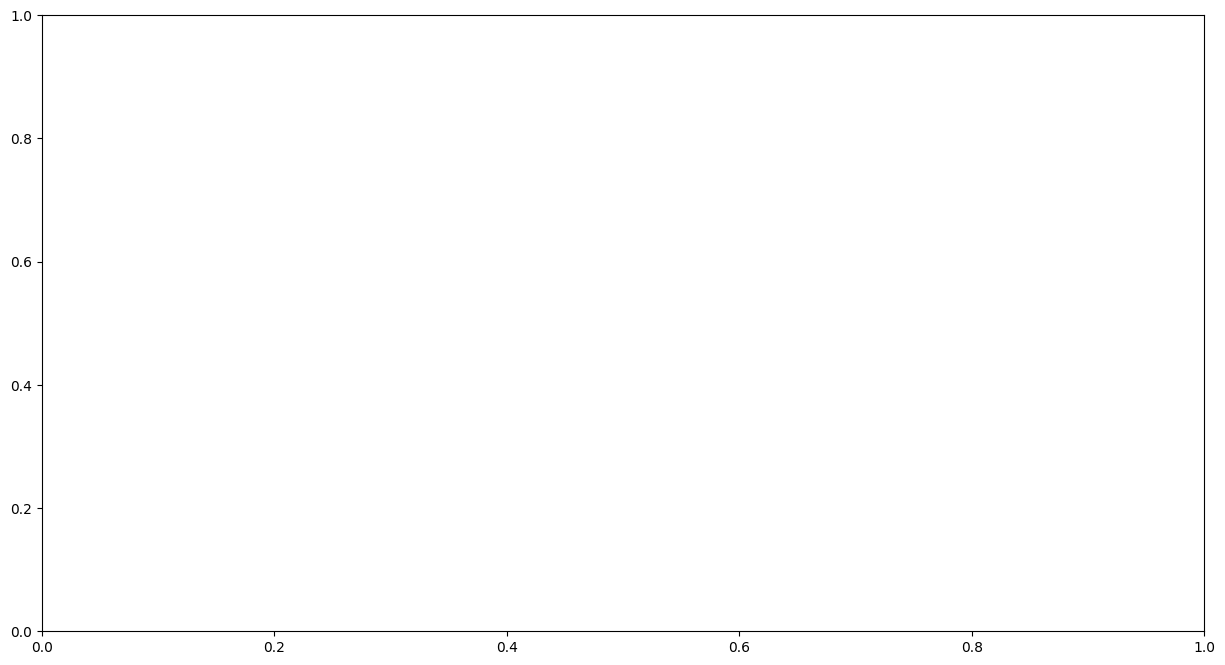

In [4]:
fig = plt.figure(figsize=(15, 8))
ax = plt.subplot(1, 1, 1)


L'istruzione seguente crea una griglia di dimensioni 2 x 1 di sottoplot e sceglie l'asse 1.

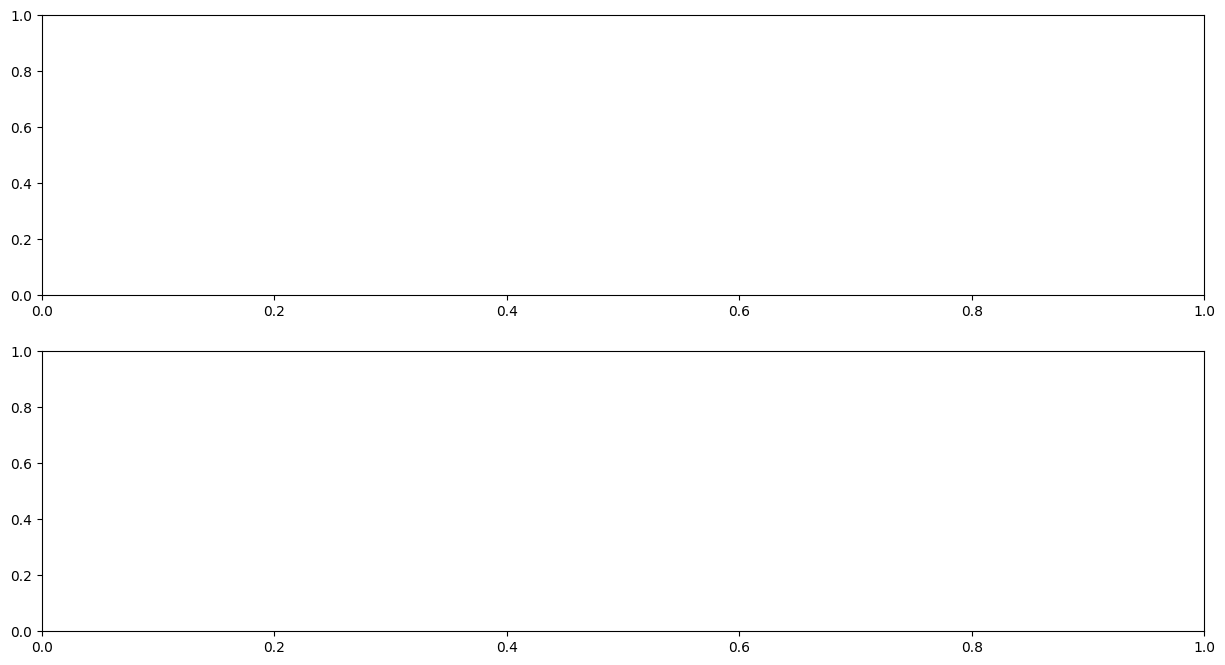

In [10]:
fig = plt.figure(figsize=(15, 8))
ax1 = plt.subplot(2, 1, 1)  # this would create a 2x1 grid of subplots
# and choose axes #1

L'istruzione seguente crea una griglia di dimensioni 2 x 1 di sottoplot e sceglie l'asse 2.

In [ ]:
fig = plt.figure(figsize=(15, 8))
ax2 = plt.subplot(2, 1, 2)  # this would create a 2x1 grid of subplots
# and choose axes #2

Creaiamo un oggetto Pandas chiamato DataFrame in cui inseriemo dei valori casuali.

In [15]:
np.random.seed(0)

df = pd.DataFrame(
    data={
        "a": np.random.randint(0, 100, 30),
        "b": np.random.randint(0, 100, 30),
        "c": np.random.randint(0, 100, 30),
    }
)
df.head()


,a,b,c
0,44,47,17
1,47,64,79
2,64,82,4
3,67,99,42
4,67,88,58


Ora creiamo una figura con una griglia 2x2 di sottoplot.

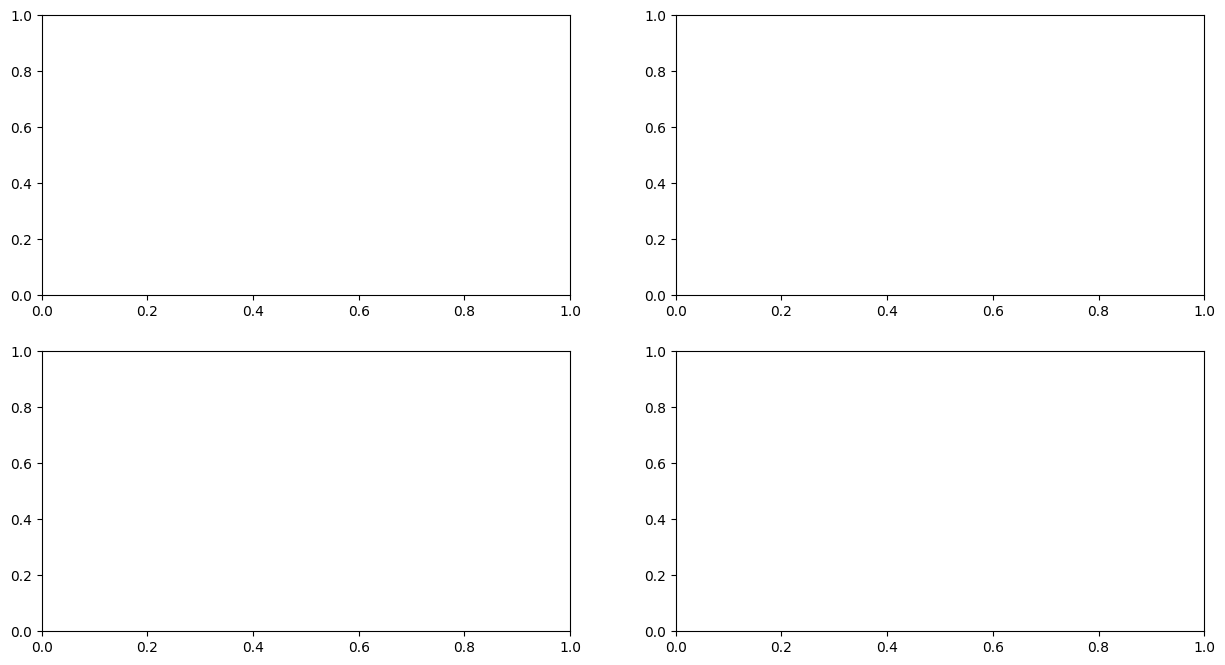

Popoliamo i grafici usando i dati contenuti in `df`.

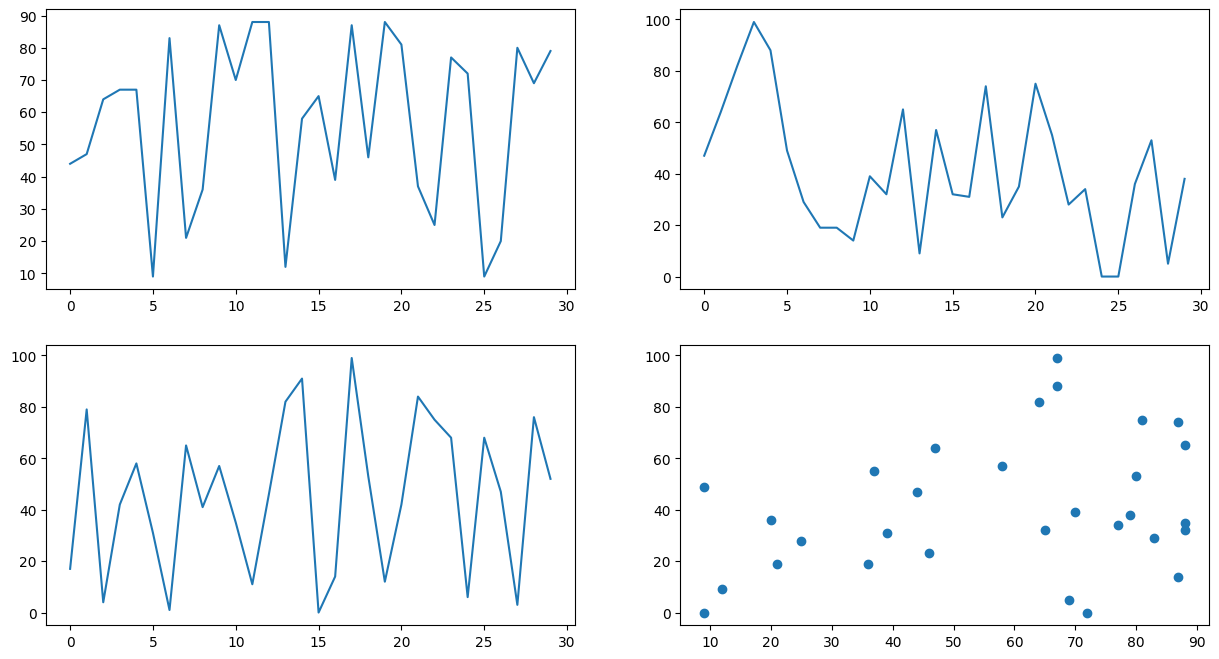

In [26]:
fig, ax = plt.subplots(2, 2, figsize=(15, 8)) 

x = np.arange(0, 30)

ax[0][0].plot(x, df["a"])  # The top-left axes
ax[0][1].plot(x, df["b"])  # The top-right axes
ax[1][0].plot(x, df["c"])  # The bottom-left axes
ax[1][1].plot(df["a"], df["b"], "o")  # The bottom-right axes


### Funzione `plot`

Le quantità da plottare sono `ndarrays`, ma anche una lista viene trasformata direttamente in un array quando viene passata come argomento del plot. Esempio:

In [ ]:
_ = plt.plot([1, 2, 3, 4])


Una lista unica viene interpretata come la funzione da plottare lungo  y, ma se ne passiamo due la prima viene interpretata come asse  x. Infine, una stringa come terzo parametro viene interpretata come un descrittore per il colore della linea, lo stile, ecc.

Esempio: disegno di dati contenuti in due liste con linea continua (parametro '-') e pallini rossi (parametro 'or')...

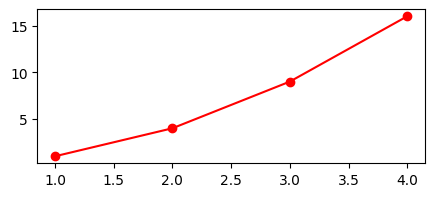

In [18]:
x = [1, 2, 3, 4]
y = [1, 4, 9, 16]
_ = plt.plot(x, y, "or-")


Oppure si possono definire due o più `ndarrays`, da passare al plot. Nell'esempio seguente vengono definite due funzioni da rappresentare in un unico grafico (si noti il colore differente prima del  `-`):

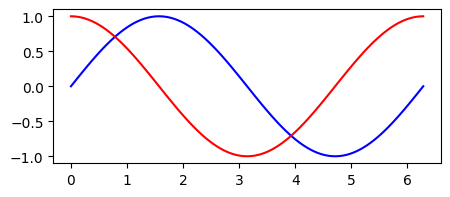

In [28]:
x = np.linspace(0.0, 2.0 * np.pi, 101)
y = np.sin(x)
z = np.cos(x)
plt.plot(x, y, "b-")
plt.plot(x, z, "r-")

Possiamo anche scrivere, in maniera più succinta, quanto segue

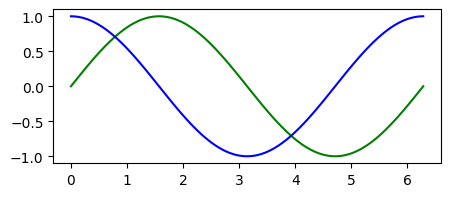

In [29]:
_ = plt.plot(x, y, "g-", x, z, "b-")

La stringa (opzionale) che appare come terzo parametro (se non specificata, disegna una linea blu) descrive il colore, un eventuale marker e lo stile della linea in un unico parametro. È possibile definire i colori comuni con le lettere seguenti:

- b: blue
- g: green
- r: red
- c: cyan
- m: magenta
- y: yellow
- k: black
- w: white

Il parametro successivo, se presente, rappresenta il tipo di linea e l'eventuale punto (eventualmente entrambi, se presenti). I simboli corrispondenti sono:

- -: solid line style
- --: dashed line style
- -.: dashed-dotted line style
- :: dotted line style
- .: point marker
- ,: pixel marker
- o: circle marker
- v: triangle down marker
- ^: triangle up marker
- <: triangle left marker
- s: square marker
- p: pentagon marker
- *: star marker
- h: hexagon marker
- +: plus marker
- x: x marker
- D: diamond marker
- |: vertical line marker
- _: horizonthal line marker

Alcuni dei possibili parametri opzionali che è possibile passare alla funzione plot sono:

- alpha: trasparenza della linea (float: 0.0 = trasparente, 1.0 = opaca)
- color (o "c"): colore della linea
- linestyle (o "ls"): stile della linea
- linewidth (o "lw"): larghezza della linea (float)
- marker: tipo di marker
- markersize (o "ms"): dimensione del marker (float)
- markevery: ogni quanti punti mettere un marker (ma si possono specificare anche markers singoli, ecc.)

Esempio:

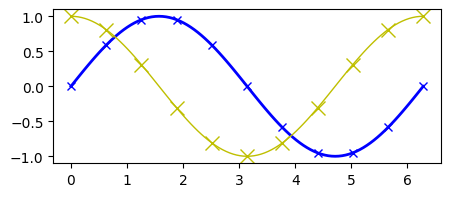

In [30]:
plt.plot(x, y, linestyle="-", linewidth=2.0, color="b", marker="x", markevery=(10))
plt.plot(x, z, ls="-", lw=1.0, marker="x", markersize=10.0, color="y", markevery=(10))

È ovviamente possibile inserire nel grafico un titolo, delle labels sugli assi, una griglia, del testo in posizione arbitraria, ecc. Una delle caratteristiche di mathplotlib è quella di poter utilizzare il rendering in $\LaTeX$ delle stringhe, facendole precedere da una "r" (che sta per "raw") per indicare a Python che questo è un codice TeX. Per esempio:

(-0.8, 1.2)

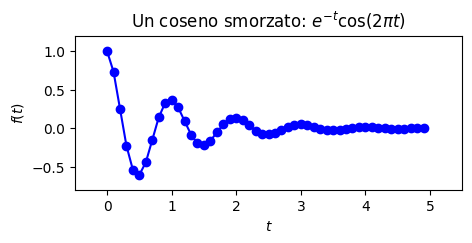

In [31]:
def f(t):
    return np.exp(-t) * np.cos(2 * np.pi * t)


t1 = np.arange(0.0, 5.0, 0.1)

plt.plot(t1, f(t1), "bo-")
plt.title(r"Un coseno smorzato: $e^{-t}\cos(2\pi t)$")
plt.xlabel(r"$t$")
plt.ylabel(r"$f(t)$")
plt.xlim(-0.5, 5.5)
plt.ylim(-0.8, 1.2)

È possibile cambiare lo stile del grafico e la palette di colori rispetto al default di matplotlib. Per esempio:

In [33]:
import seaborn as sns
from scipy.constants import golden

sns.set_theme(
    context="paper",
    style="darkgrid",
    palette="colorblind",
    rc={"figure.figsize": (5.0, 5.0 / golden)},
)
SEED = 12345
rng = np.random.default_rng(SEED)

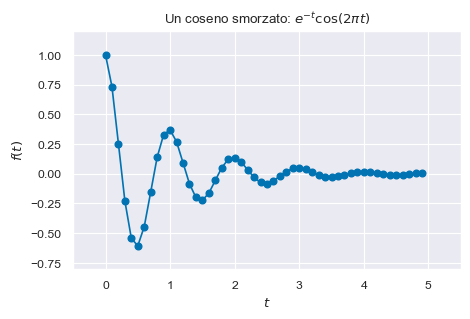

In [34]:
plt.plot(t1, f(t1), "bo-")
plt.title(r"Un coseno smorzato: $e^{-t}\cos(2\pi t)$")
plt.xlabel(r"$t$")
plt.ylabel(r"$f(t)$")
plt.xlim(-0.5, 5.5)
plt.ylim(-0.8, 1.2)
plt.show()

## Notazione `plt.subplots()`

Il modo prescritto per creare una figura con un singolo grafico usa la notazione `plt.subplots()`. 

In [ ]:
fig, ax = plt.subplots()

L'istruzione precedente assegna una variabile separata a ciascuno dei due risultati ritornati da `plt.subplots()`. Si noti non abbiamo passato alcun argomento a `plt.subplots()`. La chiamata predefinita è `subplots(nrows=1, ncols=1)`. Di conseguenza, creiamo un singolo grafico, come indicato sopra.

Consideriamo ora un caso in cui abbiamo due grafici arrangiati orizzontalmente. Definiamo delle coordinate.

In [ ]:
x1 = [1, 2, 3, 4, 5]
y1 = [11, 22, 33, 44, 55]
x2 = [2, 3, 4, 5, 6]
y2 = [77, 66, 55, 44, 33]

Si notino gli argomenti `nrows=1` e `ncols=2`, insieme all'uso di `ax1` e `ax2`.

Text(0, 0.5, '$y_2$')

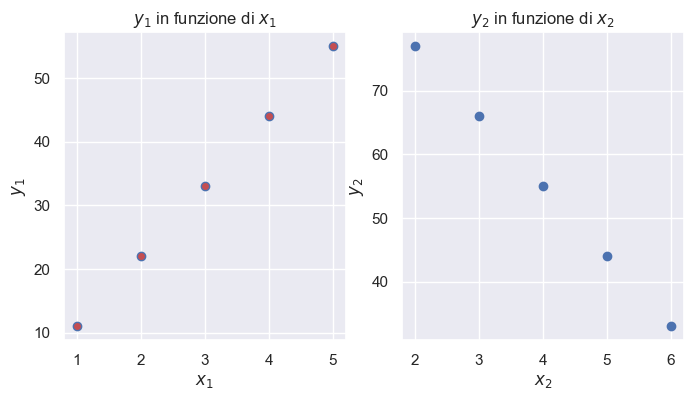

In [13]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(8, 4))

ax1.scatter(x=x1, y=y1, marker="o", c="r", edgecolor="b")
ax1.set_title("$y_1$ in funzione di $x_1$")
ax1.set_xlabel("$x_1$")
ax1.set_ylabel("$y_1$")

ax2.scatter(x=x2, y=y2, marker="o", c="b", edgecolor="b")
ax2.set_title("$y_2$ in funzione di $x_2$")
ax2.set_xlabel("$x_2$")
ax2.set_ylabel("$y_2$")

Facciamo un altro esempio usando i dati `penguins.csv`.

In [14]:
import pandas as pd

In [15]:
df = pd.read_csv('data/penguins.csv')
df.dropna(inplace=True)

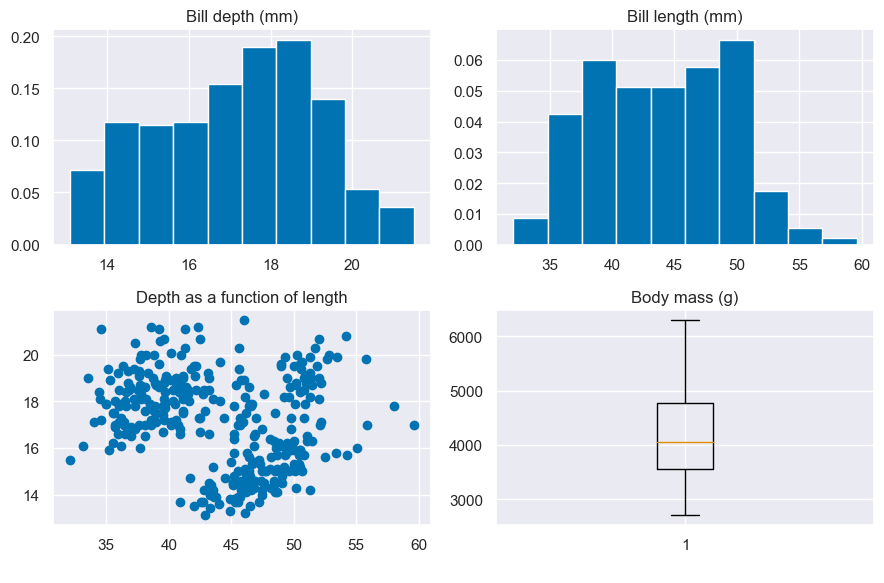

In [37]:
fig, ((ax0, ax1), (ax2, ax3)) = plt.subplots(nrows=2, ncols=2, figsize=(9, 6))
ax0.hist(df["bill_depth_mm"], 10, density=True)
ax0.set_title('Bill depth (mm)')
ax1.hist(df["bill_length_mm"], 10, density=True)
ax1.set_title('Bill length (mm)')
ax2.scatter(x=df["bill_length_mm"],  y=df["bill_depth_mm"])
ax2.set_title('Bill depth as a function of bill length')
ax3.boxplot(df["body_mass_g"])
ax3.set_title('Body mass (g)')
ax3.set_xlabel(" ")
fig.tight_layout() # handle overlaps

## Watermark

In [ ]:
%load_ext watermark
%watermark -n -u -v -iv -w